# **Kelompok 4**


- Diko Pradana Sihotang
- M. Agel Rozali
- Githa Fadilla O.P
- Neng Tasya Fradilla Putri S
- Cika Mulia Nisa

# **Disini kami akan melakukan mini project Instance Segmentation dengan menggunakan Facebook Detectron2**

Facebook Detectron 2 adalah salah satu python framework yang dapat digunakan untuk kasus object detection. Detectron dikembangkan oleh Facebook dengan menggunakan basis PyTorch sebagai deep learning frameworknya.

# **Import Data set dari COCO Dataset**


In [ ]:
! pip install pyyaml==5.1
! pip install 'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 274 kB 34.9 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=b2d37be9e1727b816f50a96e33dce48439407b906bd72f4b4a2336c97e6d2495
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask 2022.2.0 requires pyyaml>=5.3.1, but you have pyyaml 5.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/

# **Import Library**
Tahapan pertama yaitu mengimport PyTorch Detectron 2

In [ ]:
import torch, detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# **Testing Instance Segmentation menggunakan detectron 2**

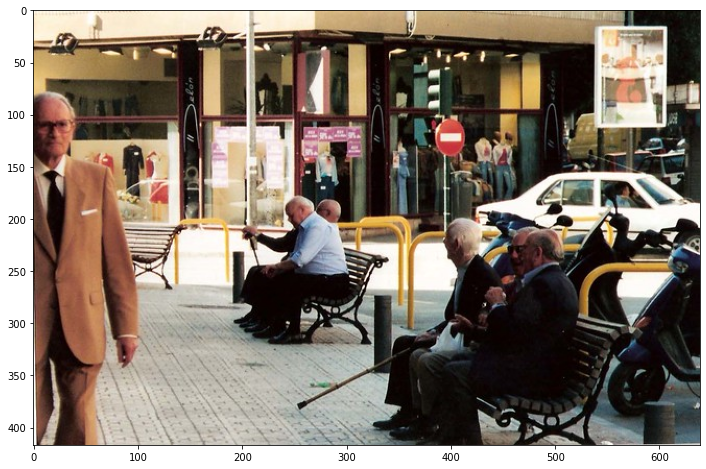

In [ ]:
import matplotlib.pyplot as plt
import requests
import cv2
response = requests.get('http://farm3.staticflickr.com/2354/2088022281_db1ed5b2c1_z.jpg')
open("input.jpg", "wb").write(response.content)

im = cv2.imread("./input.jpg")
fig, ax = plt.subplots(figsize=(18, 8))
ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))

# **Load Model**

Kita bisa gunakan model akhir tersebut untuk mendeteksi citra dengan langkah berikut. Pertama-tama kita load terlebih dahulu model dan beri sedikit pengaturan treshold.

In [ ]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

**predictor adalah objek model kita. Untuk melakukan deteksi kita cukup menuliskan perintah berikut**

Variabel outputs yang dihasilkan menyimpan data-data seperti koordinat bounding box, score, dan class object pada gambar sehingga mudah diolah. Untuk visualisasi kita bisa memanfaatkan fungsi Visualizer bawaan Detectron yang dapat langsung menampilkan gambar disertai bounding boxnya

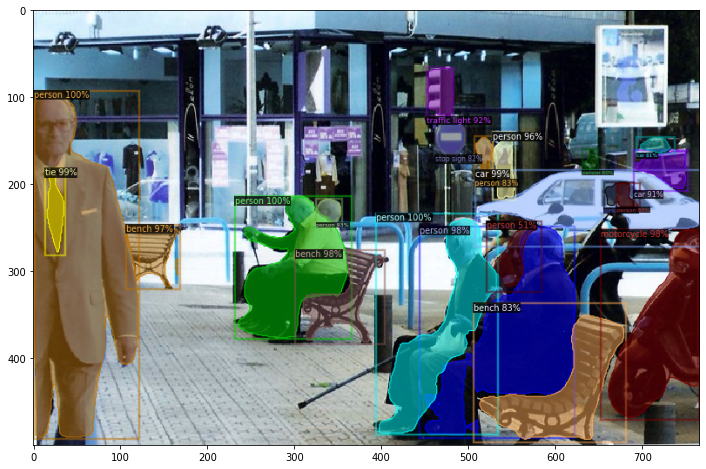

In [ ]:
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
fig, ax = plt.subplots(figsize=(18, 8))
ax.imshow(out.get_image()[:, :, ::-1])